# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [2]:
df = pd.read_pickle("shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

In [27]:
# Displaying basic information about the DataFrame
print(df.info())

# Displaying summary statistics of the DataFrame
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [30]:
# Counting the number of missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

# Divide the count of missing values by the total number of rows in the DataFrame and multiply by 100
missing_percentages = (missing_counts / len(df)) * 100
print(missing_percentages)

CRASH DATE_CRASH TIME                  0
BOROUGH                           627854
ZIP CODE                          628092
LATITUDE                          229685
LONGITUDE                         229685
LOCATION                          229685
ON STREET NAME                    424807
CROSS STREET NAME                 755532
OFF STREET NAME                  1685810
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6348
CONTRIBUTING FACTOR VEHICLE 2     307909
CONTRIBUTING FACTOR VEHICLE 3    1875114
CONTRIBUTING FACTOR VEHICLE 4    1986122
CONTRIBUTING FACTOR VEHICLE 5    2009575
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12677
VEHICLE TYPE COD

In [31]:
# Displaying unique values in the 'BOROUGH' column
print(df['BOROUGH'].unique())

[nan 'BROOKLYN' 'BRONX' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


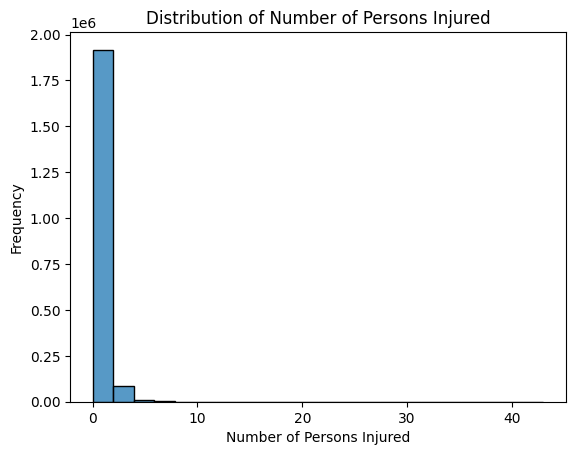

In [32]:
# Visualizing the distribution of 'NUMBER OF PERSONS INJURED' column
sns.histplot(df['NUMBER OF PERSONS INJURED'].dropna())
plt.title('Distribution of Number of Persons Injured')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()

In [33]:
# Grouping by 'BOROUGH' and calculating the average number of persons injured in each borough
borough_injuries = df.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].mean().reset_index()
print(borough_injuries)

         BOROUGH  NUMBER OF PERSONS INJURED
0          BRONX                   0.319761
1       BROOKLYN                   0.323977
2      MANHATTAN                   0.204620
3         QUEENS                   0.293695
4  STATEN ISLAND                   0.279500


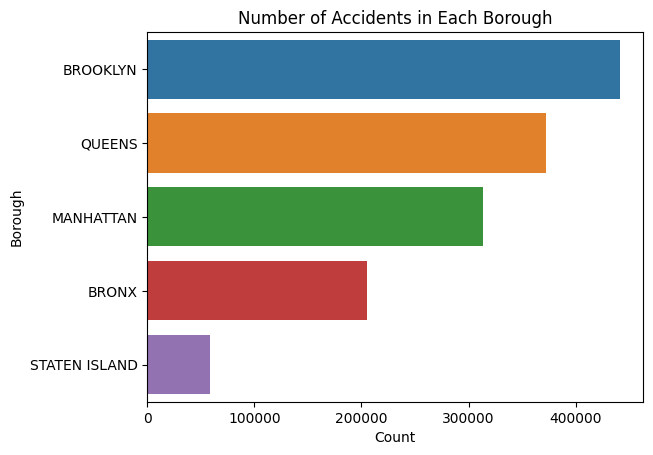

In [34]:
# Visualizing the count of accidents in each borough
sns.countplot(data=df, y='BOROUGH', order=df['BOROUGH'].value_counts().index)
plt.title('Number of Accidents in Each Borough')
plt.xlabel('Count')
plt.ylabel('Borough')
plt.show()

In [35]:
# Displaying the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'BROOKLYN'

<Figure size 1000x800 with 0 Axes>

## Borough with the maximum number of crashes reported since 2012

In [5]:
# Filter the DataFrame for rows where the crash date is from 2012 onwards
filtered_df = df[df['CRASH DATE_CRASH TIME'] >= '2012-01-01']

# Group by the 'BOROUGH' column and count the number of crashes in each borough, ignoring missing values
borough_crashes = filtered_df.groupby('BOROUGH').size()

# Identify the borough with the highest count
highest_crash_borough = borough_crashes.idxmax()
highest_crash_borough

BROOKLYN


## Borough with the maximum number of crashes adjusted for population

In [11]:
# Define the approximate populations for each borough
borough_populations = {
    'BRONX': 1446788,
    'BROOKLYN': 2648452,
    'MANHATTAN': 1638281,
    'QUEENS': 2330295,
    'STATEN ISLAND': 487155,
}

# Convert the population dictionary to a Series for easier calculations
borough_populations_series = pd.Series(borough_populations)

# Filter the DataFrame for rows where the crash date is from 2012 onwards
filtered_df = df[df['CRASH DATE_CRASH TIME'] >= '2012-01-01']

# Group by the 'BOROUGH' column and count the number of crashes in each borough, ignoring missing values
borough_crashes = filtered_df.groupby('BOROUGH').size()
print(borough_crashes)
# Calculate the crash rate per capita for each borough
crash_rate_per_capita = borough_crashes / borough_populations_series
print(crash_rate_per_capita)
# Identify the borough with the highest crash rate per capita
highest_crash_rate_borough = crash_rate_per_capita.idxmax()
print(highest_crash_rate_borough)

BOROUGH
BRONX            205345
BROOKLYN         441026
MANHATTAN        313266
QUEENS           372457
STATEN ISLAND     58297
dtype: int64
BOROUGH
BRONX            0.141932
BROOKLYN         0.166522
MANHATTAN        0.191216
QUEENS           0.159833
STATEN ISLAND    0.119668
dtype: float64
MANHATTAN


## Analyzing the leading cause of crashes

In [18]:
# Define the contributing factor columns in your DataFrame
contributing_factor_columns = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

# Concatenate the contributing factor columns to create a single series
contributing_factors = pd.concat([df[col] for col in contributing_factor_columns])

# Filter out 'Unspecified' or NaN values
contributing_factors = contributing_factors[contributing_factors.notna() & (contributing_factors != 'Unspecified')]

# Count the occurrence of each contributing factor
contributing_factor_counts = contributing_factors.value_counts()

# Identify the contributing factor with the highest count
leading_cause = contributing_factor_counts.idxmax()
print(leading_cause)

Driver Inattention/Distraction


In [19]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified' or NaN
specified_factors_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].notna() & (df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified')]

# Count the occurrence of each contributing factor in 'CONTRIBUTING FACTOR VEHICLE 1'
specified_factor_counts = specified_factors_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Identify the contributing factor with the highest count
leading_cause_specified = specified_factor_counts.idxmax()

# Calculate the proportion of accidents attributable to this cause
proportion_attributable = specified_factor_counts.max() / specified_factor_counts.sum()
proportion_attributable

0.3041797020985308

## Top 3 causes of crashes 

In [20]:
# Extract the counts of the top 3 contributing factors
top_3_factors_counts = specified_factor_counts.head(3)
print(top_3_factors_counts)
# Sum these counts
top_3_factors_sum = top_3_factors_counts.sum()

# Divide the sum by the total count of specified contributing factors to get the proportion
top_3_proportion = top_3_factors_sum / specified_factor_counts.sum()
print(top_3_proportion)

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    401262
Failure to Yield Right-of-Way     119166
Following Too Closely             107467
Name: count, dtype: int64
0.4759805664357876


## Analyzing fatalities

In [22]:
# Filter the DataFrame for rows where the crash date is from 2012 onwards
filtered_df = df[df['CRASH DATE_CRASH TIME'] >= '2012-01-01']

# Filter the rows where the number of persons killed is at least 1
fatal_accidents_df = filtered_df[filtered_df['NUMBER OF PERSONS KILLED'] >= 1]

# Count the number of such rows to get the total count of accidents involving at least one fatality
total_fatal_accidents = len(fatal_accidents_df)
print(total_fatal_accidents)

2804


## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [24]:
# Find the total number of accidents that have occurred since 2012
total_accidents = len(df[df['CRASH DATE_CRASH TIME'] >= '2012-01-01'])

# Calculate the ratio of accidents with at least one death to the total number of accidents
fatal_accident_ratio = total_fatal_accidents / total_accidents

# Multiply this ratio by 1000 to get the average number of fatal accidents per 1000 accidents
average_fatal_per_1000 = fatal_accident_ratio * 1000
print(average_fatal_per_1000)

1.3893258747079764


## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [25]:
# Count the total number of accidents in the DataFrame
total_accidents = len(df)

# Count the number of accidents where the 'BOROUGH' column is NaN or has a missing/invalid value
accidents_without_borough = df['BOROUGH'].isna().sum()

# Calculate the proportion of accidents without a Borough code
proportion_without_borough = accidents_without_borough / total_accidents
print(proportion_without_borough)

0.3110890897784957


## Which combinations of vehicles have the most number of accidents

In [26]:
# Group the data by 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2'
vehicle_combination_groups = df.groupby(['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']).size().reset_index(name='counts')

# Identify the group with the highest count
most_common_combination = vehicle_combination_groups.loc[vehicle_combination_groups['counts'].idxmax()]
print(most_common_combination)

VEHICLE TYPE CODE 1     Sedan
VEHICLE TYPE CODE 2     Sedan
counts                 197944
Name: 3948, dtype: object


***  
## Finished